In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [114]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [115]:
df1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
x_train = df.drop('label', axis = 1)
y_train = df['label']

test = df1

In [117]:
#42000 images and each image is 28 by 28 pixel
x_train.shape

(42000, 784)

In [118]:
test.shape

(28000, 784)

In [119]:
#now we're gonna reshape our image to let the model know that we're dealing with a greyscale image, hence 1 color channel

In [120]:
x_train = x_train.values.reshape(42000, 28,28)
test = test.values.reshape(28000, 28, 28)

In [121]:
x_train.shape

(42000, 28, 28)

In [122]:
#displaying the matrix of a single image, [0] defines the first instance of the data
single_image = x_train[0]

In [123]:
single_image.shape

(28, 28)

In [124]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

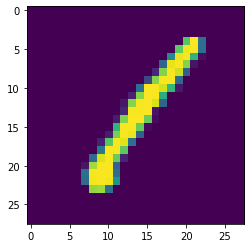

In [125]:
#matplotlib has a method to show these values in image format
plt.imshow(single_image)

In [126]:
#this looks like a '1', and since greyscale values varies from 0 to 255, we can see values close to 255 in the matrix above

In [127]:
#exploring labels
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [128]:
#here we stand correct, the first value is 1, as shown in the plot above

In [129]:
#here the values here represent labels, what we want is categories, so we have to use one-hot-encoding

In [130]:
from tensorflow.keras.utils import to_categorical

In [131]:
y_train.shape

(42000,)

In [132]:
#Here, y_train's dataset of 42000 represents labels, what we want is each of these labels to represent a category,so

In [133]:
y_example = to_categorical(y_train)

In [134]:
y_example.shape

(42000, 10)

In [135]:
#we can see that to_categorical converted a class vector into a binary class matrix

In [136]:
y_example[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [137]:
#Notice here, the first value of label was 1, so to_categorical() has transformed that into an entire row

In [138]:
#y_cat_test = to_categorical(test, num_classes=10)#to_categorical takes num_classes on its own based on the label's unique
#values, here it was from 0 to 9, hence, it took 10. You can specify them too using num_classes

In [139]:
y_cat_train = to_categorical(y_train, num_classes=10)#to_categorical takes num_classes on its own based on the label's unique
#values, here it was from 0 to 9, hence, it took 10. You can specify them too using num_classes

In [140]:
y_cat_train.shape

(42000, 10)

In [141]:
#normalize the training data
#our training data is just image data

In [142]:
single_image.max()

255

In [143]:
single_image.min()

0

In [144]:
#Here we see the max value as 255 and 0
#we're gonna scale them between 0 and 1

In [145]:
#we can use here MinMaxScaler to scale the value and fit_transform the training set and transform the test set
#we did that in ANNs because we did not wanted to assume the result of test set
#but here, we can assume the result, because we already know that the values will be between 0 and 255,so our scaling will
#not change ,hence, we'll use

In [146]:
x_train = x_train/255

In [147]:
test = test/255

In [148]:
#check the scaled image
scaled_image = x_train[0]

In [149]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [150]:
#it's between 0 and 1

In [151]:
scaled_image.max()

1.0

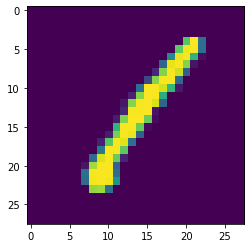

In [152]:
plt.imshow(scaled_image)

In [153]:
#now we're gonna reshape our image to let the model know that we're dealing with a greyscale image, hence 1 color channel

In [154]:
x_train.shape

(42000, 28, 28)

In [155]:
#batch_size, width, height, color channels
x_train = x_train.reshape(42000, 28, 28, 1)

In [156]:
test.shape

(28000, 28, 28)

In [157]:
test = test.reshape(28000, 28, 28, 1)

In [158]:
from tensorflow.keras.models import Sequential

In [159]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [113]:
random_seed = 2

In [160]:
x_train, x_val, y_cat_train, y_val = train_test_split(x_train, y_cat_train, test_size = 0.1, random_state=random_seed)

In [161]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4), strides = (1,1), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #flatten our layer, eg, our image is 28x28 so the flattened image will be 28*28=784 pixels

model.add(Dense(128, activation='relu'))

#OUTPUT layer
model.add(Dense(10, activation='softmax')) #chose softmax because of 'multiclass classification'

#keras,io/metrics , to check out more metrics
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [96]:
#filters:- how many filters to apply on an image
#kernel_size:- size of the matrix which strides through the whole image 
#stride:- (x,y) steps while moving the kernel 
#padding:- Padding is the extra layer we add to the corner of the image to prevent shrinkage and loss of info, such as add
# a padding of 0 on the outside of the image matrix, so that the corner matrix is also covered more than once while striding
#Since, here, we have 28 pixels, and a kernel size of 4, so 28/4, is 7 which is fully divisible, hence, we'll use 'valid' 
#padding if the result was in decimals, we would have chosen 'same' padding
#Dense layer should be the no. of neurons to your classes

In [97]:
#Based on the data parameters (not to experimented with):- input_shape, flatten(), Dense layer
#Dense layer = 10, depends upon the no. of classes, here classes are from 0 to 9
#this is multi-class classification, hence, activation would be 'softmax'
#suppose we are dealing with binary classification, eg, an image of a dog and a cat,
#in that case the Dense layer will be 1 and activation will be 'sigmoid'

In [98]:
#Can be experimented with:- filters, kernel_size, strides, activation, MaxPool size, Dense layers

In [162]:
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [164]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_val, y_val), callbacks = [early_stop])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 23s 597us/sample - loss: 0.1701 - accuracy: 0.9488 - val_loss: 0.0785 - val_accuracy: 0.9762
Epoch 2/10
37800/37800 [==============================] - 22s 573us/sample - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0696 - val_accuracy: 0.9779
Epoch 3/10
37800/37800 [==============================] - 22s 570us/sample - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 4/10
37800/37800 [==============================] - 21s 565us/sample - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0599 - val_accuracy: 0.9824


In [165]:
metrics = pd.DataFrame(model.history.history)

In [166]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.170056,0.948783,0.078549,0.976190
1,0.057211,0.982884,0.069564,0.977857
2,0.036661,0.988386,0.051294,0.983333
3,0.025304,0.991508,0.059920,0.982381


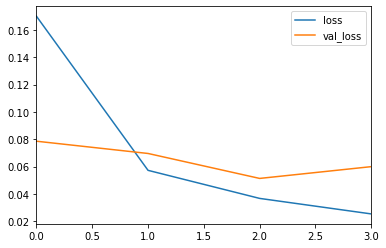

In [167]:
metrics[['loss', 'val_loss']].plot()

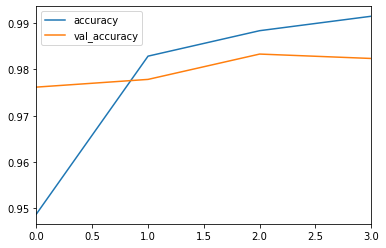

In [168]:
metrics[['accuracy', 'val_accuracy']].plot()

In [169]:
model.metrics_names

['loss', 'accuracy']

In [170]:
model.evaluate(x_val, y_val, verbose = 0)

[0.05991977082875868, 0.9823809]

In [176]:
y_val.shape

(4200, 10)

In [171]:
from sklearn.metrics import classification_report, confusion_matrix

In [179]:
predictions = model.predict(x_val)

In [180]:
# Convert predictions classes to one hot vectors 
predictions_classes = np.argmax(predictions, axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis = 1)

In [63]:
#we'll use y_true for predictions

In [181]:
print(classification_report(y_true, predictions_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       411
           1       0.99      0.99      0.99       485
           2       0.99      0.99      0.99       403
           3       0.97      0.99      0.98       418
           4       1.00      0.97      0.98       461
           5       0.98      0.98      0.98       372
           6       0.97      1.00      0.98       413
           7       0.99      0.98      0.99       446
           8       0.96      0.98      0.97       382
           9       0.98      0.98      0.98       409

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



In [182]:
print(confusion_matrix(y_true, predictions_classes))

[[401   0   1   1   1   0   7   0   0   0]
 [  0 481   0   2   0   1   0   0   1   0]
 [  0   0 397   2   0   0   0   0   3   1]
 [  0   0   0 412   0   2   1   0   3   0]
 [  0   4   1   0 445   0   2   1   2   6]
 [  0   0   0   6   0 363   2   0   1   0]
 [  0   0   0   0   0   1 412   0   0   0]
 [  0   1   2   0   0   0   0 439   4   0]
 [  0   0   0   2   0   2   1   1 376   0]
 [  1   1   0   0   1   0   0   3   3 400]]


In [183]:
import seaborn as sns

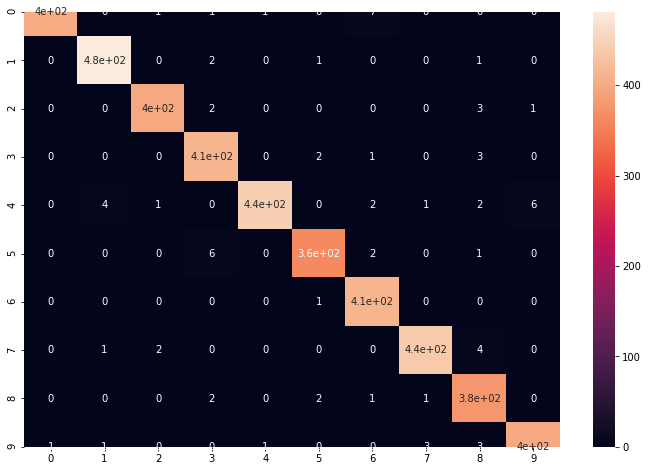

In [184]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_true, predictions_classes), annot=True)

In [186]:
# predict results
results = model.predict(test)

# gives the index of the greatest number in the given column
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [187]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [188]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [189]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [190]:
submission.to_csv('digit_recognizer_mnist.csv', index = False)